In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()#训练集和测试集
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]#训练集中前5000是验证集，后55000训练集
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


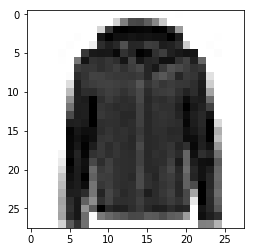

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")#cmap用来从彩到灰
    plt.show()
show_single_image(x_train[0])#图是28*28的

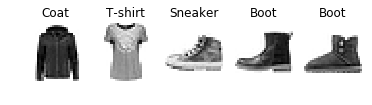

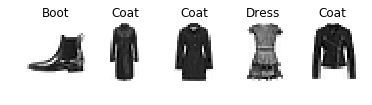

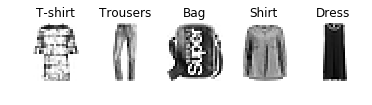

In [6]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):#分别是行数 列数 输入的图片 图片对应标签 标签对应衣服名
    assert len(x_data)==len(y_data)#验证x长度和y相同
    assert n_rows * n_cols < len(x_data)#验证输入行列数不超过整个训练集
    plt.figure(figsize=(n_cols*1.2,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows,n_cols,index+1)#index从0开始需要+1
            plt.imshow(x_data[index],cmap="binary")
            plt.axis('off')
            plt.title(class_names[y_data[index]])#y对应上class_name
        plt.show()
class_names=['T-shirt','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']
show_imgs(3,5,x_train,y_train,class_names)

In [21]:
#归一化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
#把x_train转换成float32的类型，此时x_train结构[55000,28,28]，reshape（-1,1）将他从三维搞成一维向量,进行归一化，reshape(-1,28,28)再将它变回来
x_valid_scaler=scaler.fit_transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler=scaler.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
print(np.max(x_train_scaler),np.min(x_train_scaler))


2.023144 -0.81051385


In [ ]:
#独热编码
y_valid=pd.get_dummies(y_valid)
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [19]:
#创建模型1
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#把图像展平
model.add(keras.layers.Dense(300,activation='relu'))#隐含层1有300个神经元
model.add(keras.layers.Dense(100,activation='relu'))#隐含层2有100个神经元
model.add(keras.layers.Dense(10,activation='softmax'))#最后是10个神经元，激活函数softmax

sgd=keras.optimizers.SGD(0.0005)#学习率
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

In [15]:
model.layers#可以看到一共四层 输入层 隐含层 隐含层 输出层

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
history=model.fit(x_train_scaler,y_train,epochs=50,validation_data=(x_valid_scaler,y_valid))

Epoch 1/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3800 - accuracy: 0.8644 - val_loss: 0.3852 - val_accuracy: 0.8678
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3765 - accuracy: 0.8655 - val_loss: 0.3818 - val_accuracy: 0.8676
Epoch 3/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3732 - accuracy: 0.8673 - val_loss: 0.3798 - val_accuracy: 0.8684
Epoch 4/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3699 - accuracy: 0.8679 - val_loss: 0.3788 - val_accuracy: 0.8700
Epoch 5/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3671 - accuracy: 0.8692 - val_loss: 0.3753 - val_accuracy: 0.8692
Epoch 6/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3643 - accuracy: 0.8701 - val_loss: 0.3736 - val_accuracy: 0.8696
Epoch 7/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3616 - accuracy: 0.8718 - val_loss: 0.3716 - val_accur

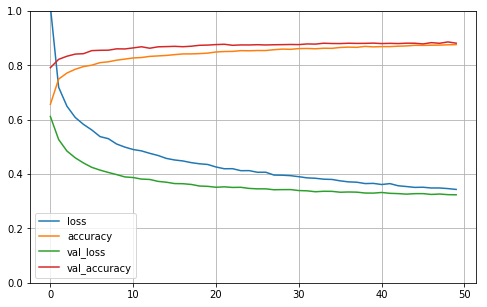

In [28]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curve(history)

In [23]:
model.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3659 - accuracy: 0.8697


[0.3658599853515625, 0.869700014591217]

In [24]:
#模型2
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#把图像展平
for i in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))#多加几层神经元
model.add(keras.layers.Dense(10,activation='softmax'))#最后是10个神经元，激活函数softmax

sgd=keras.optimizers.SGD(0.001)#学习率
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

In [25]:
history=model.fit(x_train_scaler,y_train,epochs=10,validation_data=(x_valid_scaler,y_valid))

Epoch 1/10
1719/1719 [==============================] - 18s 11ms/step - loss: 2.3018 - accuracy: 0.1436 - val_loss: 2.3011 - val_accuracy: 0.1764
Epoch 2/10
1719/1719 [==============================] - 18s 11ms/step - loss: 2.3002 - accuracy: 0.2369 - val_loss: 2.2990 - val_accuracy: 0.2618
Epoch 3/10
1719/1719 [==============================] - 20s 11ms/step - loss: 2.2969 - accuracy: 0.2839 - val_loss: 2.2940 - val_accuracy: 0.3312
Epoch 4/10
1719/1719 [==============================] - 20s 12ms/step - loss: 2.2890 - accuracy: 0.2994 - val_loss: 2.2821 - val_accuracy: 0.2750
Epoch 5/10
1719/1719 [==============================] - 20s 11ms/step - loss: 2.2700 - accuracy: 0.2684 - val_loss: 2.2525 - val_accuracy: 0.2598
Epoch 6/10
1719/1719 [==============================] - 20s 11ms/step - loss: 2.2154 - accuracy: 0.2421 - val_loss: 2.1473 - val_accuracy: 0.2310
Epoch 7/10
1719/1719 [==============================] - 19s 11ms/step - loss: 1.8359 - accuracy: 0.2641 - val_loss: 1.4394 -

In [26]:
model.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7939 - accuracy: 0.6946


[0.7939195036888123, 0.694599986076355]

In [8]:
#模型3
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#把图像展平
for i in range(20):
    model.add(keras.layers.Dense(100,activation='selu'))#多加几层神经元
    model.add(keras.layers.BatchNormalization())#批归一化
model.add(keras.layers.Dense(10,activation='softmax'))#最后是10个神经元，激活函数softmax

sgd=keras.optimizers.SGD(0.001)#学习率
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

In [9]:
history=model.fit(x_train_scaler,y_train,epochs=100,validation_data=(x_valid_scaler,y_valid))

Epoch 1/100
1719/1719 [==============================] - 46s 27ms/step - loss: 0.8836 - accuracy: 0.6994 - val_loss: 0.5221 - val_accuracy: 0.8168
Epoch 2/100
1719/1719 [==============================] - 44s 26ms/step - loss: 0.6398 - accuracy: 0.7763 - val_loss: 0.4553 - val_accuracy: 0.8376
Epoch 3/100
1719/1719 [==============================] - 44s 26ms/step - loss: 0.5788 - accuracy: 0.7971 - val_loss: 0.4307 - val_accuracy: 0.8450
Epoch 4/100
1719/1719 [==============================] - 44s 26ms/step - loss: 0.5458 - accuracy: 0.8079 - val_loss: 0.4130 - val_accuracy: 0.8554
Epoch 5/100
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5218 - accuracy: 0.8164 - val_loss: 0.3988 - val_accuracy: 0.8564
Epoch 6/100
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5013 - accuracy: 0.8227 - val_loss: 0.3888 - val_accuracy: 0.8616
Epoch 7/100
1719/1719 [==============================] - 43s 25ms/step - loss: 0.4810 - accuracy: 0.8280 - val_loss: 0

In [10]:
model.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8854


[0.33487269282341003, 0.8853999972343445]

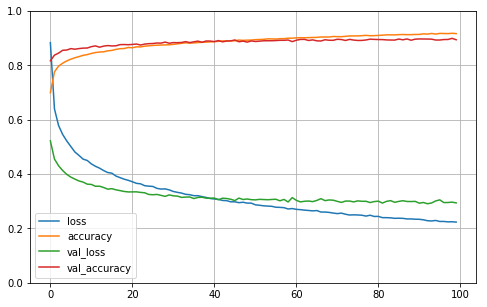

In [11]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curve(history)

In [5]:
#模型4
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#把图像展平
for i in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))#多加几层神经元
    model.add(keras.layers.BatchNormalization())#批归一化
model.add(keras.layers.Dense(10,activation='softmax'))#最后是10个神经元，激活函数softmax

sgd=keras.optimizers.SGD(0.001)#学习率
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

In [6]:
history=model.fit(x_train_scaler,y_train,epochs=100,validation_data=(x_valid_scaler,y_valid))

Epoch 1/100
1719/1719 [==============================] - 8s 4ms/step - loss: 1.8443 - accuracy: 0.3891 - val_loss: 0.9933 - val_accuracy: 0.6566
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0712 - accuracy: 0.6305 - val_loss: 0.7434 - val_accuracy: 0.7396
Epoch 3/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.9178 - accuracy: 0.6841 - val_loss: 0.6627 - val_accuracy: 0.7664
Epoch 4/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8453 - accuracy: 0.7058 - val_loss: 0.6121 - val_accuracy: 0.7830
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7934 - accuracy: 0.7243 - val_loss: 0.5764 - val_accuracy: 0.7952
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7546 - accuracy: 0.7392 - val_loss: 0.5488 - val_accuracy: 0.8038
Epoch 7/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7262 - accuracy: 0.7472 - val_loss: 0.5231 - val_ac

In [7]:
model.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8777


[0.3469051718711853, 0.8776999711990356]

In [22]:
#模型5
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#把图像展平
for i in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))#多加几层神经元
    model.add(keras.layers.BatchNormalization())#批归一化
model.add(keras.layers.Dense(10,activation='softmax'))#最后是10个神经元，激活函数softmax

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

In [23]:
history=model.fit(x_train_scaler,y_train,epochs=100,validation_data=(x_valid_scaler,y_valid))

Epoch 1/100
1719/1719 [==============================] - 10s 6ms/step - loss: 1.1412 - accuracy: 0.5957 - val_loss: 0.6027 - val_accuracy: 0.7864
Epoch 2/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7094 - accuracy: 0.7525 - val_loss: 0.5383 - val_accuracy: 0.8194
Epoch 3/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6155 - accuracy: 0.7861 - val_loss: 0.5145 - val_accuracy: 0.8134
Epoch 4/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5773 - accuracy: 0.8034 - val_loss: 0.5327 - val_accuracy: 0.8182
Epoch 5/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5617 - accuracy: 0.8082 - val_loss: 0.5227 - val_accuracy: 0.8284
Epoch 6/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5383 - accuracy: 0.8172 - val_loss: 0.4957 - val_accuracy: 0.8460
Epoch 7/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5009 - accuracy: 0.8289 - val_loss: 0.4575 -

In [24]:
model.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3766 - accuracy: 0.8890


[0.3765682280063629, 0.8889999985694885]

In [16]:
a=pd.get_dummies(y_train_all)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [22]:
#6
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#把图像展平
for i in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))#多加几层神经元
    model.add(keras.layers.BatchNormalization())#批归一化
model.add(keras.layers.Dense(10,activation='softmax'))#最后是10个神经元，激活函数softmax

model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

In [23]:
history=model.fit(x_train_scaler,y_train,epochs=100,validation_data=(x_valid_scaler,y_valid))

Epoch 1/100
1719/1719 [==============================] - 24s 14ms/step - loss: 1.1305 - accuracy: 0.6008 - val_loss: 0.5905 - val_accuracy: 0.7942
Epoch 2/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.7023 - accuracy: 0.7583 - val_loss: 0.5451 - val_accuracy: 0.7954
Epoch 3/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.6190 - accuracy: 0.7897 - val_loss: 0.4895 - val_accuracy: 0.8240
Epoch 4/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.5861 - accuracy: 0.7993 - val_loss: 0.5386 - val_accuracy: 0.8156
Epoch 5/100
1719/1719 [==============================] - 25s 14ms/step - loss: 0.5664 - accuracy: 0.8078 - val_loss: 0.4760 - val_accuracy: 0.8340
Epoch 6/100
1719/1719 [==============================] - 30s 17ms/step - loss: 0.5362 - accuracy: 0.8177 - val_loss: 0.4438 - val_accuracy: 0.8562
Epoch 7/100
1719/1719 [==============================] - 25s 15ms/step - loss: 0.4976 - accuracy: 0.8314 - val_loss: 0

In [24]:
model.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3895 - accuracy: 0.8872


[0.38945648074150085, 0.8871999979019165]

In [4]:
#模型7
cnn=tf.keras.Sequential()
#输入层
cnn.add(tf.keras.layers.InputLayer(input_shape=(28,28,1)))
cnn.add(tf.keras.layers.BatchNormalization())
#卷积层和池化层
cnn.add(tf.keras.layers.Convolution2D(64, (4, 4),activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#防止过拟合
cnn.add(tf.keras.layers.Dropout(0.1))
#卷积层和池化层
cnn.add(tf.keras.layers.Convolution2D(64, (4, 4),activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#防止过拟合
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
cnn.compile(loss="categorical_crossentropy",optimizer = tf.optimizers.Adam(),metrics=["accuracy"])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0

In [5]:
x_train_scaler=x_train_scaler.reshape([-1,28,28,1])
x_valid_scaler=x_valid_scaler.reshape([-1,28,28,1])
x_test_scaler=x_test_scaler.reshape([-1,28,28,1])

In [70]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
history=model.fit(x_train_scaler,y_train,epochs=20,validation_data=(x_valid_scaler,y_valid))

Epoch 1/20
1719/1719 [==============================] - 61s 36ms/step - loss: 0.3600 - accuracy: 0.8687 - val_loss: 0.2903 - val_accuracy: 0.8900
Epoch 2/20
1719/1719 [==============================] - 60s 35ms/step - loss: 0.2419 - accuracy: 0.9110 - val_loss: 0.2473 - val_accuracy: 0.9130
Epoch 3/20
1719/1719 [==============================] - 59s 35ms/step - loss: 0.1917 - accuracy: 0.9281 - val_loss: 0.2326 - val_accuracy: 0.9208
Epoch 4/20
1719/1719 [==============================] - 58s 34ms/step - loss: 0.1539 - accuracy: 0.9418 - val_loss: 0.2611 - val_accuracy: 0.9092
Epoch 5/20
1719/1719 [==============================] - 58s 34ms/step - loss: 0.1242 - accuracy: 0.9530 - val_loss: 0.2806 - val_accuracy: 0.9138
Epoch 6/20
1719/1719 [==============================] - 58s 34ms/step - loss: 0.1008 - accuracy: 0.9631 - val_loss: 0.3188 - val_accuracy: 0.9088
Epoch 7/20
1719/1719 [==============================] - 61s 35ms/step - loss: 0.0879 - accuracy: 0.9678 - val_loss: 0.3192 -

In [71]:
model.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.7310 - accuracy: 0.9089


[0.7310441732406616, 0.9089000225067139]

In [7]:
cnn.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
history=cnn.fit(x_train_scaler,y_train,epochs=3,validation_data=(x_valid_scaler,y_valid))

Epoch 1/3
1719/1719 [==============================] - 78s 45ms/step - loss: 0.4514 - accuracy: 0.8384 - val_loss: 0.2901 - val_accuracy: 0.8992
Epoch 2/3
1719/1719 [==============================] - 77s 45ms/step - loss: 0.3187 - accuracy: 0.8853 - val_loss: 0.2752 - val_accuracy: 0.9026
Epoch 3/3
1719/1719 [==============================] - 78s 46ms/step - loss: 0.2848 - accuracy: 0.8955 - val_loss: 0.2483 - val_accuracy: 0.9064


In [8]:
cnn.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2693 - accuracy: 0.9018


[0.269267201423645, 0.9017999768257141]

In [9]:
cnn.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
history=cnn.fit(x_train_scaler,y_train,epochs=3,validation_data=(x_valid_scaler,y_valid))

Epoch 1/3
1719/1719 [==============================] - 80s 47ms/step - loss: 0.2615 - accuracy: 0.9039 - val_loss: 0.2485 - val_accuracy: 0.9056
Epoch 2/3
1719/1719 [==============================] - 79s 46ms/step - loss: 0.2425 - accuracy: 0.9110 - val_loss: 0.2232 - val_accuracy: 0.9150
Epoch 3/3
1719/1719 [==============================] - 79s 46ms/step - loss: 0.2304 - accuracy: 0.9151 - val_loss: 0.2209 - val_accuracy: 0.9188


In [10]:
cnn.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2499 - accuracy: 0.9090


[0.24988627433776855, 0.9089999794960022]

In [11]:
cnn.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
history=cnn.fit(x_train_scaler,y_train,epochs=3,validation_data=(x_valid_scaler,y_valid))

Epoch 1/3
1719/1719 [==============================] - 79s 46ms/step - loss: 0.2197 - accuracy: 0.9187 - val_loss: 0.2220 - val_accuracy: 0.9152
Epoch 2/3
1719/1719 [==============================] - 79s 46ms/step - loss: 0.2098 - accuracy: 0.9216 - val_loss: 0.2041 - val_accuracy: 0.9220
Epoch 3/3
1719/1719 [==============================] - 79s 46ms/step - loss: 0.1983 - accuracy: 0.9265 - val_loss: 0.2206 - val_accuracy: 0.9218


In [12]:
cnn.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2416 - accuracy: 0.9094


[0.24155224859714508, 0.9093999862670898]

In [13]:
cnn.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
history=cnn.fit(x_train_scaler,y_train,epochs=3,validation_data=(x_valid_scaler,y_valid))

Epoch 1/3
1719/1719 [==============================] - 79s 46ms/step - loss: 0.1926 - accuracy: 0.9274 - val_loss: 0.2079 - val_accuracy: 0.9224
Epoch 2/3
1719/1719 [==============================] - 79s 46ms/step - loss: 0.1868 - accuracy: 0.9302 - val_loss: 0.2124 - val_accuracy: 0.9236
Epoch 3/3
1719/1719 [==============================] - 79s 46ms/step - loss: 0.1773 - accuracy: 0.9342 - val_loss: 0.1988 - val_accuracy: 0.9302


In [14]:
cnn.evaluate(x_test_scaler,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2172 - accuracy: 0.9219


[0.2171778827905655, 0.9218999743461609]